In [1]:
!python --version

Python 3.6.15


In [52]:
# Self Experiment 
#--- IMPORT DEPENDENCIES ------------------------------------------------------+

from __future__ import division
import random
import math
import numpy as np
import pandas as pd

#--- COST FUNCTION ------------------------------------------------------------+

# function we are attempting to optimize (minimize): min(f(x)) = x[0] - x[1]**3
def func1(x):
    soln=0
    for i in range(len(x)):
        soln = x[0] - x[1]**3
    return soln

#--- MAIN ---------------------------------------------------------------------+

class Particle:
    def __init__(self,x0):
        self.position_i=[]          # particle position
        self.velocity_i=[]          # particle velocity
        self.pos_best_i=[]          # best position individual
        self.err_best_i=-1          # best error individual
        self.err_i=-1               # error individual

        for i in range(0,num_dimensions):
            self.velocity_i.append(random.random())
            self.position_i.append(x0[i])

    # evaluate current fitness
    def evaluate(self,costFunc):
        self.err_i=costFunc(self.position_i)

        # check to see if the current position is an individual best
        if self.err_i < self.err_best_i or self.err_best_i==-1:
            self.pos_best_i=self.position_i
            self.err_best_i=self.err_i

    # update new particle velocity
    def update_velocity(self,pos_best_g):
        w = 1        # constant inertia weight (how much to weigh the previous velocity)
        c1= 2        # cognitive constant
        c2= 2        # social constant

        for i in range(0,num_dimensions):
            r1=random.random()
            r2=random.random()

            vel_cognitive=c1*r1*(self.pos_best_i[i]-self.position_i[i])
            vel_social=c2*r2*(pos_best_g[i]-self.position_i[i])
            self.velocity_i[i]=w*self.velocity_i[i]+vel_cognitive+vel_social

    # update the particle position based on new velocity updates
    def update_position(self,bounds):
        for i in range(0,num_dimensions):
            self.position_i[i]=self.position_i[i]+self.velocity_i[i]

            # adjust maximum position if necessary
            if self.position_i[i]>bounds[i][1]:
                self.position_i[i]=bounds[i][1]

            # adjust minimum position if neseccary
            if self.position_i[i]<bounds[i][0]:
                self.position_i[i]=bounds[i][0]
                
class PSO():
    def __init__(self,costFunc,x0,bounds,num_particles,maxiter):
        global num_dimensions

        num_dimensions=len(x0)
        err_best_g=-1                   # best error for group
        pos_best_g=[]                   # best position for group

        # establish the swarm
        swarm=[]
        for i in range(0,num_particles):
            swarm.append(Particle(x0))

        # begin optimization loop
        i=0
        while i < maxiter:
            print(i,err_best_g)
            # cycle through particles in swarm and evaluate fitness
            for j in range(0,num_particles):
                swarm[j].evaluate(costFunc)

                # determine if current particle is the best (globally)
                if swarm[j].err_i < err_best_g or err_best_g == -1:
                    pos_best_g=list(swarm[j].position_i)
                    err_best_g=float(swarm[j].err_i)

            # cycle through swarm and update velocities and position
            for j in range(0,num_particles):
                swarm[j].update_velocity(pos_best_g)
                swarm[j].update_position(bounds)
            i+=1

        # print final results
        print('FINAL:')
        print(pos_best_g)
        print(err_best_g)

if __name__ == "__PSO__":
    main()

#--- RUN ----------------------------------------------------------------------+

initial=[4.9,-4.8]               # initial starting location [x1,x2...]
bounds=[(-5,5),(-5,5)]  # input bounds [(x1_min,x1_max),(x2_min,x2_max)...]
PSO(func1,initial,bounds,num_particles=10,maxiter=20)

#--- END ----------------------------------------------------------------------+

0 -1
1 115.49199999999999
2 60.744300524477964
3 27.90777706189139
4 6.178660582420292
5 3.907666613543104
6 -108.78698075242642
7 -120.0
8 -120.0
9 -120.0
10 -120.0
11 -120.0
12 -120.0
13 -120.0
14 -120.0
15 -120.0
16 -120.0
17 -120.0
18 -120.0
19 -120.0
FINAL:
[5, 5]
-120.0


# **Problem**

In [5]:
#--- IMPORT DEPENDENCIES -----------Code By Anupam Sharma------------------------+

from __future__ import division
import random
import math
import numpy as np
import pandas as pd

#--- COST FUNCTION ------------------------------------------------------------+
# function to optimize (minimize): min(f(x)) = x[0] - x[1]**3

# Constant & Weight Values 

c1 = c2 = 2; w = 1

# Calculating Initial Random Values for Position(X) in range(-5,5) and Velocity(V) in range (0,1) Vectors

# Input Swarm Strength

S = int(input("Enter Swarm Strength in Integers (Even No Only) = "))  # Input Swarm Strength
while(S%2 != 0):
    print("Please enter even No =")
    S = int(input())
N = int(input("Enter the No of Iterations Required = "))        # Input No of Iterations

print("Let's Start with the Entered values of Swarm Strength =", S,"\nAnd No of Iterations as =", N)

X=[]
rows, cols= S, 2
for i in range(rows):
    col = []
    for j in range(cols):
        col.append(round((random.uniform(-5,5)),2))
    X.append(col)

#print("Randomly Generated Initial Position Vector, X = ", X)

X = np.array(X)
X = X.reshape(S,2)
print("Randomly Generated Initial Position Vector within bounds (-5,5) is\n", X)

# Velocity vector in range(0,1) V = {V1,V2,V3,V4,V5,V6,V7,V8,V9,V10} 

V=[]
rows, cols= S, 2
for i in range(rows):
    col = []
    for j in range(cols):
        col.append(round((random.random()),2))
    V.append(col)

V = np.array(V)
V = V.reshape(S,2)
print("\nRandomly Generated Initial Velocity Vector within bounds (0,1) is\n", V)

# Iterations Begin
i = 0
# begin
for i in range(0,N):
    print("\nIteration No. = ", i)
    print("\nPosition Vector is\n", X)
    print("\nVelocity Vector is\n", V)
    
    # Calculating Fitness Values(F1) of Position Vector X
    # Fitness Function
    F1=[]
    rows = S
    for i in range(rows):
        F1.append(round((X[i][0] - X[i][1]**3),2))
        F1.append
    print("\nCorresponding Fitness Values = ",F1)

    # Finding Global Best for this iteration
    soln = min(F1)
    print('\nGlobal Best Solution = ', soln)

    for i in range(rows):
        F1.append(X[i][0] - X[i][1]**3)
        if(F1[i] == soln):
            gbest = X[i]
        F1.append       
    print("\nGlobal Best Value = ", gbest) 

    # Randomly Generated 'r' values between 0 & 1 for 10 Position vectors 

    r=[]

    rows, cols=S, 2
    for i in range(rows):
        col = []
        for j in range(cols):
            col.append(round((random.random()),2))
        r.append(col)

    print("Randomly Generated r values = ", r)

    # Updated Velocity(v) [Clamped between -5 to 5]  and Position(x) Vectors 

    v=[]
    x=[]
    rows, cols = S, 2
    for i in range(rows):
        col = []
        #print("\nParticle =", i)
        pbest = X[i]
        #print("pbest =", pbest)
        #print("gbest =", gbest)
        for j in range(cols):
            cog = round(c1*r[i][j]*(pbest[j]-X[i][j]),2); #print("cog =", cog)
            soc = round(c2*r[i][j]*(gbest[j]-X[i][j]),2); #print("soc =", soc)
            vel = V[i][j] + cog + soc
            if(vel > 5):   # Clamping Velocity to Vmax = 5 with delta = 0.5    
                vel = 5
                v.append(vel)
            elif(vel < -5):
                vel = -5 
                v.append(vel);       
            else:
                v.append(round(vel,2));
            x.append(round((X[i][j] + v[j]),2));            
        v.append
        #print(v[i])
        x.append
        #print(x[i])

    print("\nUpdated Velocity Vector is =", v)
    #print("\nUpdated Position Vector is =", x)

    # Keeping Updated Postion Vector(x) in bounds (-5 & 5)
    rows = 2*S
    for j in range(rows):
        if(x[j] < -5):
            x[j] = -5
        if(x[j] > 5):
            x[j] = 5
        x.append
    #print("\nUpdated Within Bounds Position Vector is =", x)

    x = np.array(x)
    x = x.reshape(S,2)
    print("\nUpdated Within Bounds Position Vector is\n",x)

    # Calculating Corresponding Fitness Values(F2) for Updated Position Vector(x)

    F2=[]
    rows = S
    for i in range(rows):
        F2.append(round((x[i][0] - x[i][1]**3),2))
        F2.append
    print("\nCorresponding Fitness Values = ", F2)

    # Finding Global Best for this iteration

    soln = min(F2)
    print('\nGlobal Best = ', soln)

    for i in range(rows):
        F2.append(x[i][0]**2 + x[i][1]**2)
        if(F2[i] == soln):
            gbest = x[i]
        F2.append       
    print("\nGlobal Best Value = ", gbest) 

    # Updated Position Vector(X1) based on Greedy Approach Fitness Values min(F1 & F2)

    X1=[]
    rows = S
    for i in range(rows):
        if(F2[i] < F1[i]):
            X1.append(x[i])
        else:
            X1.append(X[i])

    #print("Position Vector, X1 = ", X1)
    X1 = np.array(X1)
    X1 = X1.reshape(S,2)
    print("Next Iteration Postion Vector\n", X1)

    v = np.array(v)
    v = v.reshape(S,2)
    print("Next Iteration Velocity Vector\n", v)

    # Getting Ready for Next Iteration
    X = X1
    V = v
    i+=1
    
print("\nResults After Iterations = ", N,",With Swarm Strength = ", S)
print("\nBest Solution = ", gbest)
print("\nAttained Fitness Value = ", soln)

Enter Swarm Strength in Integers (Even No Only) =  3


Please enter even No =


 3


Please enter even No =


 3


Please enter even No =


 4
Enter the No of Iterations Required =  4


Let's Start with the Entered values of Swarm Strength = 4 
And No of Iterations as = 4
Randomly Generated Initial Position Vector within bounds (-5,5) is
 [[-3.04  0.73]
 [ 4.81  0.5 ]
 [-3.61  3.59]
 [ 4.93  0.44]]

Randomly Generated Initial Velocity Vector within bounds (0,1) is
 [[0.52 0.72]
 [0.65 0.42]
 [0.11 0.93]
 [0.64 0.42]]

Iteration No. =  0

Position Vector is
 [[-3.04  0.73]
 [ 4.81  0.5 ]
 [-3.61  3.59]
 [ 4.93  0.44]]

Velocity Vector is
 [[0.52 0.72]
 [0.65 0.42]
 [0.11 0.93]
 [0.64 0.42]]

Corresponding Fitness Values =  [-3.43, 4.68, -49.88, 4.84]

Global Best Solution =  -49.88

Global Best Value =  [-3.61  3.59]
Randomly Generated r values =  [[0.1, 0.89], [0.67, 0.53], [0.15, 0.53], [0.4, 0.92]]

Updated Velocity Vector is = [0.41, 5, -5, 3.7, 0.11, 0.93, -5, 5]

Updated Within Bounds Position Vector is
 [[-2.63  5.  ]
 [ 5.    5.  ]
 [-3.2   5.  ]
 [ 5.    5.  ]]

Corresponding Fitness Values =  [-127.63, -120.0, -128.2, -120.0]

Global Best =  -128.2

Global Be

<function matplotlib.pyplot.show(close=None, block=None)>

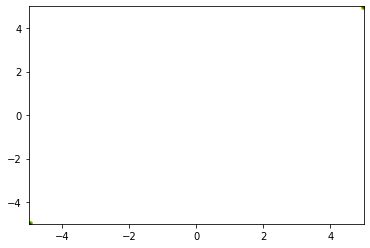

In [74]:
import matplotlib.pyplot as plt

fig, ax1 = pltfigsize=(10, 8)

plt.scatter(x,y=X, marker='+', c='r', edgecolor='b')
plt.scatter(x,y=X1, marker='o', c='g', edgecolor='y')

plt.ylim(-5, 5)
plt.xlim(-5, 5)

plt.show